In [ ]:
#Programa para o desenvolvimento do Desafio do Módulo 02 da disciplina MPST do bootcamp de MLE

In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import google

In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="winequality-red.csv"
arquivo_desafio= pd.read_csv(nome_do_arquivo, sep=';')

In [ ]:
#apresentando as 5 primeiras linhas do dataset
arquivo_desafio.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**1. No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**

In [ ]:
#quantas instâncias e atributos existem?
arquivo_desafio.shape

(1599, 12)

**2. Quantos tipos diferentes de dados existem no dataset do desafio?**

In [ ]:
arquivo_desafio.info() #verificando os tipos de variáveis do arquivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**3. Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?**

In [ ]:
#Verificando se existem nulos
arquivo_desafio.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
(arquivo_desafio['residual sugar'].isnull().sum()/ len(arquivo_desafio['residual sugar']))*100

0.0

**4. Qual é o desvio padrão para a variável "fixed acidity" ?**

In [ ]:
arquivo_desafio['fixed acidity'].std()

1.7410963181277006

**5. Qual é a mediana para a variável "residual sugar"?**

In [ ]:
arquivo_desafio['residual sugar'].median()

2.2

**6. Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:**

*   Existe uma correlação negativa. Quanto maior o "fixed acidity, maior é o "pH".
*   Existe uma correlação negativa. Quanto menor o "fixed acidity, menor é o "pH".
*   **Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".**
*   Existe uma correlação positiva. Quanto maior o "fixed acidity, menor é o "pH".

In [ ]:
import seaborn as sns
correlacao = arquivo_desafio[['fixed acidity', 'pH']].copy()
corr = correlacao.corr()
corr.style.background_gradient(cmap='coolwarm')  #tudo pra plotar a matriz de correlação num mapa de calor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


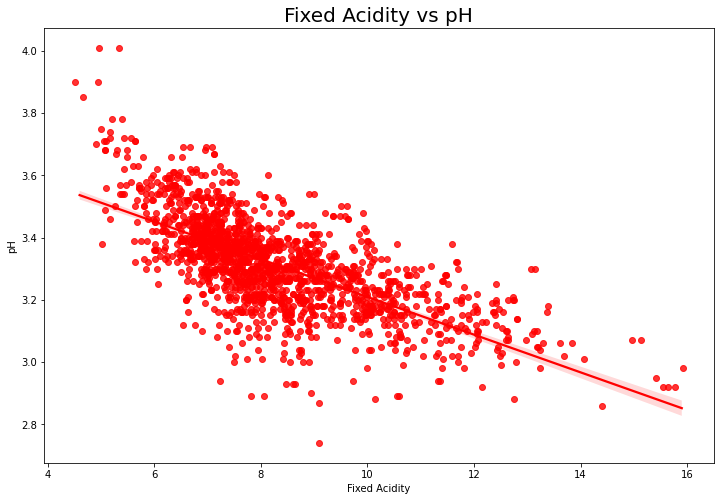

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='fixed acidity', y='pH', data=arquivo_desafio, color='r', x_jitter=0.2)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH', fontsize=20)
plt.show();

**7. Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":**

In [ ]:
correlacao = arquivo_desafio[['quality', 'alcohol']].copy()
corr = correlacao.corr()
corr.style.background_gradient(cmap='coolwarm')  #tudo pra plotar a matriz de correlação num mapa de calor

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


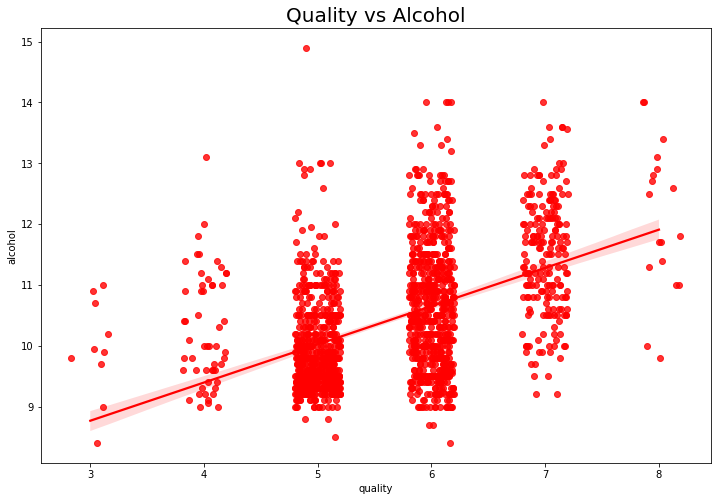

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='quality', y='alcohol', data=arquivo_desafio, color='r', x_jitter=0.2)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Quality vs Alcohol', fontsize=20)
plt.show();

**8. Quantas instâncias existem para a qualidade do vinho igual a 5?**

In [ ]:
arquivo_desafio.query('quality == 5').shape[0] #query consulta as colunas de um DataFrame com uma expressão booleana.

681

**9. Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?**

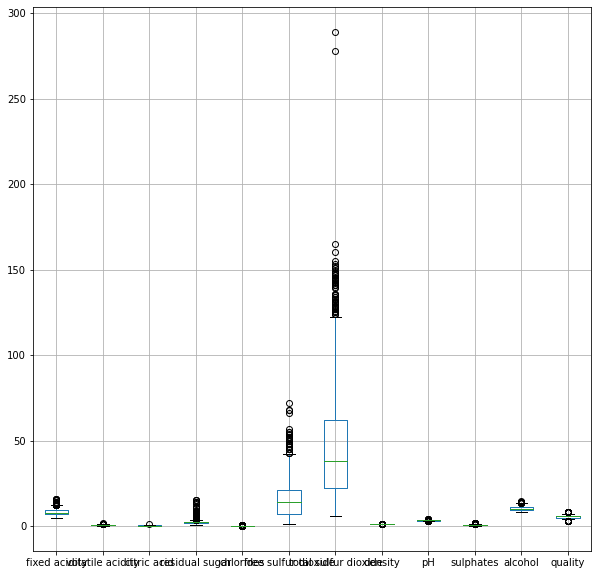

In [ ]:
#Plotando um gráfico de boxplot das nossas variáveis
arquivo_desafio.boxplot(figsize = (10,10))

In [ ]:
#separando nosso dadaset em variáveis preditores e variável target
X = arquivo_desafio.iloc[:,:-1]
y = arquivo_desafio.iloc[:,-1]

In [ ]:
#Normalizando nossos dados de entrada com os parâmetros default
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
array_scaler = scaler.fit_transform(X)
col = X.columns

In [ ]:
#Verificando como ficou nossos dados de entrada após aplicar a normalização em um dataframe
arquivo_desafio_normalizado = pd.DataFrame(array_scaler, columns = col)
arquivo_desafio_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [ ]:
#Encontrando o valor mínimo para a variável "fixed acidity"
arquivo_desafio_normalizado['fixed acidity'].min()

0.0

**Construção do Modelo**

*   KNN
*   Decision Tree
*   RandomForest
*   SVM
*   MLP

**10. Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?**

In [ ]:
#Dividindo nossos dados em treinamento e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(arquivo_desafio_normalizado,y,test_size = 0.3, random_state = 1)

In [ ]:
#Aplicando o algoritmo de KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #Utilizaremos 5 vizinhos mais próximos
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
#Verificando a acurácia do modelo
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test,y_pred)
print("Acurácia KNN: {}".format(acuracia))

Acurácia KNN: 0.5645833333333333


**11. Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)
clf_arvore.score(X_test, y_test)

0.5875

**12. Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
clf_floresta.score(X_test, y_test)

0.6791666666666667

**13. Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?**

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)
clf_svm.score(X_test, y_test)

0.5854166666666667

**14. Aplicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?**

In [ ]:
#Aplicando o MLP
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(alpha = 1e-5,hidden_layer_sizes = (5,5), random_state = 1)
clf_mlp.fit(X_train,y_train)
y_pred_mlp = clf_mlp.predict(X_test)
acuracia_mlp = accuracy_score(y_test,y_pred_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Verificando a acurácia do MLP
print("Acurácia MLP: {}".format(acuracia_mlp))

Acurácia MLP: 0.6


**15. Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?**

In [ ]:
#Modificando os dataset 
arquivo_desafio_modificado = arquivo_desafio.copy()

In [ ]:
#Separando os dados
X_new = arquivo_desafio_modificado.iloc[:,:11]
y_new = arquivo_desafio_modificado.quality

In [ ]:
#Dicionário de Variáveis
Y_new = y_new.replace({6:1,7:1,8:1,5:0,4:0,3:0})

In [ ]:
#Aplicando a normalização
scaler_new = MinMaxScaler()
new_array = scaler_new.fit_transform(X_new)
df_new_array = pd.DataFrame(new_array, columns = X_new.columns)
df_new_array.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [ ]:
#Separando nossos dados em treino e teste
X_train,X_test,y_train,y_test = train_test_split(new_array,Y_new,test_size = 0.3, random_state = 1)

In [ ]:
#Aplicando nosso algoritmo RandomForest
clf_forest_new = RandomForestClassifier(max_depth=10, random_state = 1)
clf_forest_new.fit(X_train,y_train)
y_pred_new_forest = clf_forest_new.predict(X_test)
acuracia_forest_new = accuracy_score(y_test,y_pred_new_forest)

In [ ]:
#Verificando Nossa acurácia
print("Acurácia RandomForest Modificada: {}".format(acuracia_forest_new))

Acurácia RandomForest Modificada: 0.8041666666666667
